In [2]:
# Mengekstrak Data-Set
#1. Upload File DataSet.Zip ke Direktory
from zipfile import ZipFile
file_name = "/content/DataSet.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


paper03-049.png
paper06-072.png
paper05-004.png
paper04-040.png
paper07-009.png
paper07-012.png
paper06-119.png
paper04-090.png
paper03-061.png
paper06-067.png
paper02-055.png
paper06-042.png
paper01-109.png
paper07-027.png
paper01-074.png
paper05-083.png
paper04-016.png
paper05-068.png
paper07-010.png
paper02-045.png
paper05-078.png
paper02-095.png
paper06-108.png
paper06-080.png
paper01-020.png
paper01-078.png
paper01-017.png
paper02-042.png
paper05-039.png
paper05-062.png
paper04-108.png
paper04-031.png
paper02-071.png
paper06-024.png
paper01-025.png
paper07-083.png
paper03-073.png
paper01-042.png
paper04-071.png
paper06-007.png
paper06-110.png
paper05-044.png
paper04-117.png
paper05-050.png
paper01-093.png
paper01-077.png
paper02-001.png
paper06-075.png
paper02-050.png
paper07-104.png
paper02-028.png
paper06-030.png
paper03-006.png
paper03-050.png
paper06-096.png
paper05-048.png
paper05-022.png
paper01-004.png
paper04-099.png
paper01-062.png
paper01-071.png
paper07-044.png
paper02-

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     3,276,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,920,087 (37.84 MB)

 Trainable params: 3,306,695 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,613,392 (25.23 MB)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.9271 - loss: 0.5647
Akurasi pada test set: 0.87


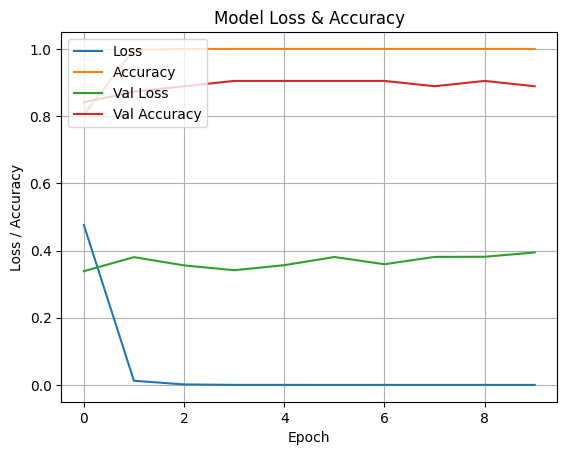

In [3]:
import os
import cv2
import numpy as np
from keras.models import load_model, Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt

# Fungsi untuk memuat data citra dan target dari direktori
def LoadCitraTraining(sDir, LabelKelas):
    JumlahKelas = len(LabelKelas)
    TargetKelas = np.eye(JumlahKelas)

    # Menyiapkan variabel list untuk data menampung citra dan data target
    X = [] # Menampung data citra
    T = [] # Menampung Target

    for i in range(JumlahKelas):
      # Membaca file citra di setiap direktori dataset
        DirKelas = os.path.join(sDir, LabelKelas[i])
        files = os.listdir(DirKelas)

        for f in files:
            ff = f.lower()
            print(f)
            if ff.endswith('.jpg') or ff.endswith('.jpeg') or ff.endswith('.png'):
                NmFile = os.path.join(DirKelas, f)
                img = cv2.imread(NmFile, 1)
                img = cv2.resize(img, (128, 128))
                img = np.asarray(img) / 255
                img = img.astype('float32')
                X.append(img)
                T.append(TargetKelas[i])

    X = np.array(X).astype('float32')
    T = np.array(T).astype('float32')
    return X, T

# Fungsi untuk membuat model CNN
def ModelDeepLearningCNN(JumlahKelas):
    input_img = Input(shape=(128, 128, 3))
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = Flatten()(x)
    x = Dense(100, activation='relu')(x)
    x = Dense(100, activation='relu')(x)
    x = Dense(JumlahKelas, activation='softmax')(x)
    ModelCNN = Model(inputs=input_img, outputs=x)
    ModelCNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return ModelCNN

# Fungsi untuk training CNN dan menyimpan model
def TrainingCNN(X_train, y_train, X_val, y_val, JumlahEpoh, NamaFileBobot='weight.h5'):  # ⬅️ Diubah: parameter menerima data langsung
    JumlahKelas = y_train.shape[1]  # ⬅️ Diubah: Jumlah kelas dari data training
    ModelCNN = ModelDeepLearningCNN(JumlahKelas)
    history = ModelCNN.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=JumlahEpoh, shuffle=True)  # ⬅️ Ditambah validation_data
    ModelCNN.save(NamaFileBobot)
    return ModelCNN, history

# Fungsi untuk klasifikasi gambar
def Klasifikasi(DirDataSet, DirKlasifikasi, LabelKelas, ModelCNN=None):
    if ModelCNN is None:
        ModelCNN = load_model('weight.h5')

    X = []
    ls = []
    DirKelas = os.path.join(DirDataSet, DirKlasifikasi)
    print(DirKelas)
    files = os.listdir(DirKelas)

    for f in files:
        ff = f.lower()
        print(f)
        if ff.endswith('.jpg') or ff.endswith('.jpeg') or ff.endswith('.png'):
            ls.append(ff)
            NmFile = os.path.join(DirKelas, f)
            img = cv2.imread(NmFile, 1)
            img = cv2.resize(img, (128, 128))
            img = np.asarray(img) / 255
            img = img.astype('float32')
            X.append(img)

    X = np.array(X).astype('float32')
    hs = ModelCNN.predict(X)

    LKlasifikasi = []
    LKelasCitra = []
    n = X.shape[0]

    for i in range(n):
        v = hs[i, :]
        if v.max() > 0.5:
            idx = np.argmax(v)
            LKelasCitra.append(LabelKelas[idx])
        else:
            idx = -1
            LKelasCitra.append("-")
        LKlasifikasi.append(idx)

    LKlasifikasi = np.array(LKlasifikasi)
    return LKlasifikasi, LKelasCitra, ls

# ====================================================
# PROGRAM UTAMA
# ====================================================
if __name__ == "__main__":
    # 1. Menentukan parameter training

    LabelKelas = ("paper", "rock", "scissors")
    JumlahEpoh = 10
    FileBobot = "RPS_model.h5"

    # 2. Load data dari folder train, val, dan test
    X_train, y_train = LoadCitraTraining("/content/DataSet/train", LabelKelas)   # Ditambahkan: load train
    X_val, y_val     = LoadCitraTraining("/content/DataSet/val", LabelKelas)     # Ditambahkan: load val
    X_test, y_test   = LoadCitraTraining("/content/DataSet/test", LabelKelas)    # Ditambahkan: load test

    # 3. Training model
    ModelCNN, history = TrainingCNN(X_train, y_train, X_val, y_val, JumlahEpoh, FileBobot)
    ModelCNN.summary()

    # 4. Evaluasi model pada test set
    loss, acc = ModelCNN.evaluate(X_test, y_test)  # Ditambahkan: evaluasi test
    print(f"Akurasi pada test set: {acc:.2f}")

  # 5. Menampilkan grafik loss dan accuracy
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_loss'], label='Val Loss')               # Ditambahkan: val loss
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')       # Ditambahkan: val acc
    plt.title('Model Loss & Accuracy')
    plt.ylabel('Loss / Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()


In [ ]:
# Opsional gak perlu di run
from google.colab import drive
drive.mount('/content/drive')

NameError: name 'drive' is not defined

**Impelmentasi CNN**

In [4]:
import os
import cv2
import numpy as np
from keras.models import load_model

def Klasifikasi(DirDataSet, DirKlasifikasi, LabelKelas, ModelCNN):
    # Menyiapkan data input yang akan diklasifikasikan
    X = []
    ls = []
    DirKelas = os.path.join(DirDataSet, DirKlasifikasi)
    print("Membaca dari:", DirKelas)

    files = os.listdir(DirKelas)
    for f in files:
        ff = f.lower()
        print("Memproses:", f)
        if ff.endswith('.jpg') or ff.endswith('.jpeg') or ff.endswith('.png'):
            ls.append(ff)
            NmFile = os.path.join(DirKelas, f)
            img = cv2.imread(NmFile, 1)
            img = cv2.resize(img, (128, 128))
            img = np.asarray(img) / 255.0
            X.append(img)

    # Konversi ke array dan normalisasi
    X = np.array(X, dtype='float32')

    # Prediksi
    hs = ModelCNN.predict(X)

    LKlasifikasi = []
    LKelasCitra = []

    for v in hs:
        if v.max() > 0.5:
            idx = np.argmax(v)
            LKelasCitra.append(LabelKelas[idx])
        else:
            idx = -1
            LKelasCitra.append("-")
        LKlasifikasi.append(idx)

    return ls, hs, LKelasCitra

# ============================================
# Program Utama
# ============================================

# Direktori dataset
DirektoriDataSet = "/content/DataSet"

# Label kelas
LabelKelas =  ("paper", "rock", "scissors")

# Load model CNN
ModelCNN = load_model("RPS_model.h5")

# Daftar split dataset
SplitDataset = ["train", "val", "test"]

# Tampilkan hasil klasifikasi
for split in SplitDataset:  # ⬅️ perubahan: klasifikasi untuk setiap bagian dataset
    print(f"\n====================")
    print(f" Klasifikasi untuk: {split}")
    print(f"====================")
    for kelas in LabelKelas:
        print(f"\n=== Folder: {split}/{kelas} ===")
        ls, hs, LKelasCitra = Klasifikasi(os.path.join(DirektoriDataSet, split), kelas, LabelKelas, ModelCNN)
        print("Nama file:", ls)
        print("Hasil Klasifikasi:", LKelasCitra)


 Klasifikasi untuk: train

=== Folder: train/paper ===
Membaca dari: /content/DataSet/train/paper
Memproses: paper03-049.png
Memproses: paper06-072.png
Memproses: paper05-004.png
Memproses: paper04-040.png
Memproses: paper07-009.png
Memproses: paper07-012.png
Memproses: paper06-119.png
Memproses: paper04-090.png
Memproses: paper03-061.png
Memproses: paper06-067.png
Memproses: paper02-055.png
Memproses: paper06-042.png
Memproses: paper01-109.png
Memproses: paper07-027.png
Memproses: paper01-074.png
Memproses: paper05-083.png
Memproses: paper04-016.png
Memproses: paper05-068.png
Memproses: paper07-010.png
Memproses: paper02-045.png
Memproses: paper05-078.png
Memproses: paper02-095.png
Memproses: paper06-108.png
Memproses: paper06-080.png
Memproses: paper01-020.png
Memproses: paper01-078.png
Memproses: paper01-017.png
Memproses: paper02-042.png
Memproses: paper05-039.png
Memproses: paper05-062.png
Memproses: paper04-108.png
Memproses: paper04-031.png
Memproses: paper02-071.png
Memproses:

In [5]:
! pip install gradio

In [ ]:
import gradio as gr
from keras.models import load_model
import numpy as np
from PIL import Image

# Label kelas sesuai model
LabelKelas =  ("paper", "rock", "scissors")

# Load model
model = load_model("/content/RPS_model.h5")  # Ganti dengan nama modelmu

# Fungsi prediksi
def prediksi_rps(img):
    img = img.resize((128, 128))               # Resize gambar
    img = np.asarray(img) / 255.0              # Normalisasi
    img = img.reshape(1, 128, 128, 3)           # Ubah ke batch
    hasil = model.predict(img)[0]
    idx = np.argmax(hasil)
    confidence = hasil[idx]
    return f"{LabelKelas[idx]} ({confidence*100:.2f}%)"

# Buat antarmuka Gradio
demo = gr.Interface(
    fn=prediksi_rps,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="Klasifikasi Batu Gunting Kertas",
    description="Upload gambar tangan dengan pose batu, gunting, atau kertas."
)

demo.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9ae9ba8baa21d4c8f7.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
